<a href="https://colab.research.google.com/github/angiecombs11-ops/PurdueHW/blob/main/MLHomeworkpractice6_3_1_6_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('diabetes.csv')
data.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,159.1,67.5,27.0,408.6,57.0,0.642,36.0,tested_negative
1,14.0,170.3,111.6,30.0,758.4,65.6,1.157,53.0,tested_positive
2,10.0,139.3,88.5,83.5,831.3,46.2,1.204,23.0,tested_positive
3,7.0,150.6,24.8,49.6,337.6,29.0,1.391,43.0,tested_positive
4,6.0,102.2,116.4,51.8,351.5,60.4,1.993,31.0,tested_positive


In [4]:
# Split the dataset into features and target
X = data.drop(columns=['class'])
y = data['class'].apply(lambda x: 1 if x == 'tested_positive' else 0)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

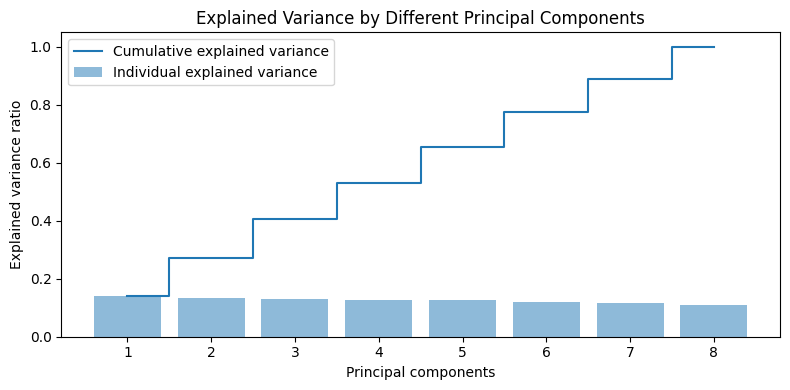

In [5]:
# Apply PCA without reducing dimensionality to find the optimal number of components
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(X_train_scaled)

# Explained variance ratios
explained_variance = pca.explained_variance_ratio_


plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance by Different Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


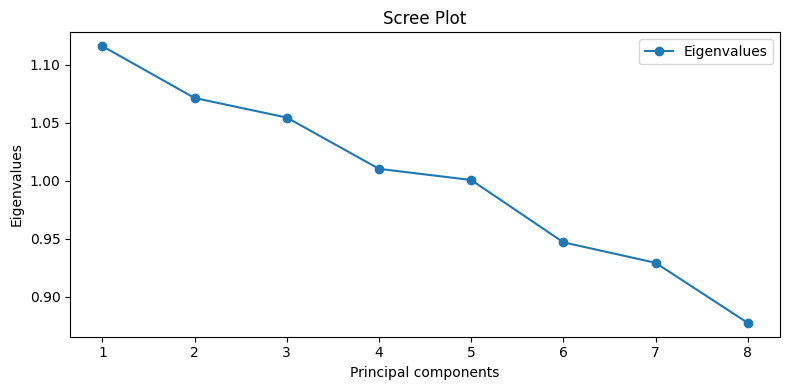

In [6]:
# Eigenvalues (which are proportional to the explained variance)
eigenvalues = pca.explained_variance_

# Scree plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', label='Eigenvalues')
plt.xlabel('Principal components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [8]:
import pandas as pd
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

df_train_pca = pd.DataFrame(data=X_train_pca, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
df_train_pca['Target'] = y_train

df_test_pca = pd.DataFrame(data=X_test_pca, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
df_test_pca['Target'] = y_test

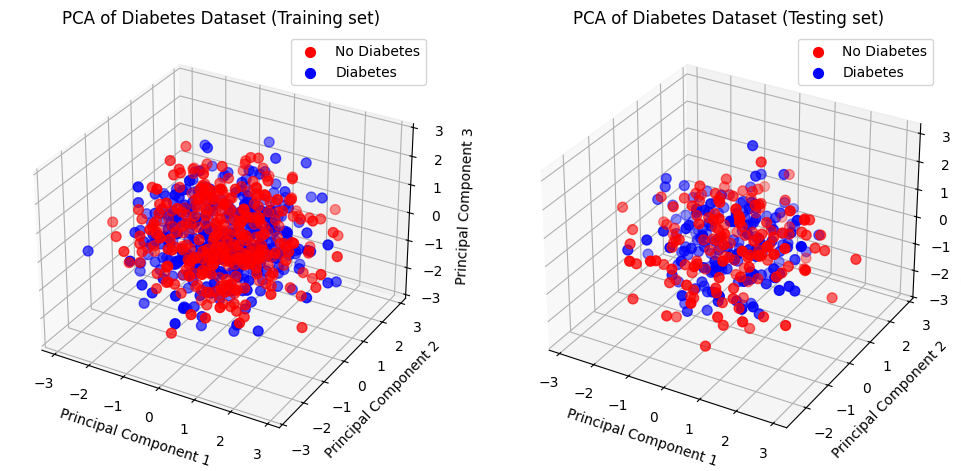

In [9]:
# Plotting the 3D scatter plot
fig = plt.figure(figsize=(12, 8))

# Training set
ax1 = fig.add_subplot(121, projection='3d')
colors = ['r', 'b']
for target, color in zip([0, 1], colors):
    indices = df_train_pca['Target'] == target
    ax1.scatter(df_train_pca.loc[indices, 'Principal Component 1'],
                df_train_pca.loc[indices, 'Principal Component 2'],
                df_train_pca.loc[indices, 'Principal Component 3'],
                c=color, s=50)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('Principal Component 3')
ax1.legend(['No Diabetes', 'Diabetes'])
ax1.set_title('PCA of Diabetes Dataset (Training set)')
ax1.grid()

# Testing set
ax2 = fig.add_subplot(122, projection='3d')
for target, color in zip([0, 1], colors):
    indices = df_test_pca['Target'] == target
    ax2.scatter(df_test_pca.loc[indices, 'Principal Component 1'],
                df_test_pca.loc[indices, 'Principal Component 2'],
                df_test_pca.loc[indices, 'Principal Component 3'],
                c=color, s=50)
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_zlabel('Principal Component 3')
ax2.legend(['No Diabetes', 'Diabetes'])
ax2.set_title('PCA of Diabetes Dataset (Testing set)')
ax2.grid()

plt.show()

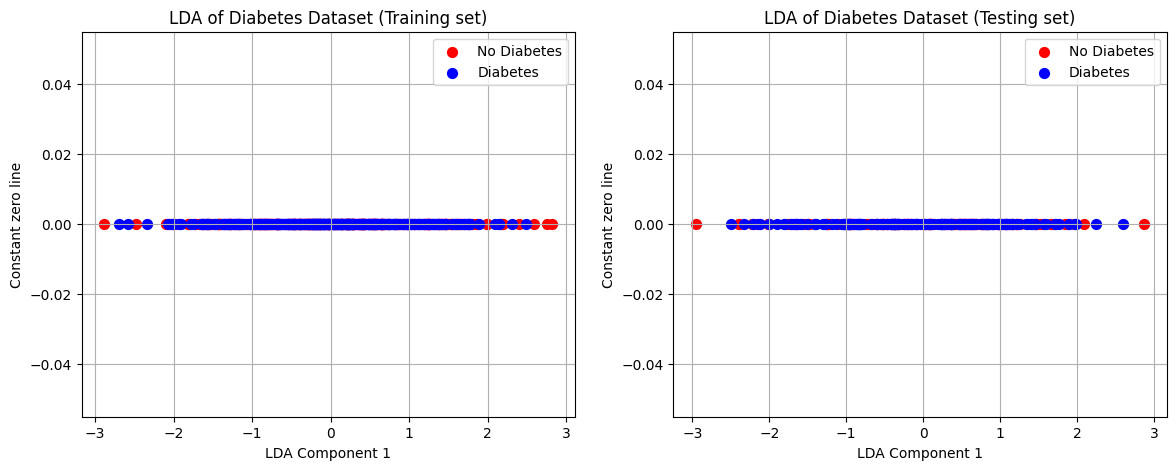

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

df_train_lda = pd.DataFrame(data=X_train_lda, columns=['LDA Component 1'])
df_train_lda['Target'] = y_train

df_test_lda = pd.DataFrame(data=X_test_lda, columns=['LDA Component 1'])
df_test_lda['Target'] = y_test


import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

# Training set
plt.subplot(1, 2, 1)
colors = ['r', 'b']
for target, color in zip([0, 1], colors):
    indices = df_train_lda['Target'] == target
    plt.scatter(df_train_lda.loc[indices, 'LDA Component 1'], np.zeros_like(df_train_lda.loc[indices, 'LDA Component 1']),
                c=color, s=50)
plt.xlabel('LDA Component 1')
plt.ylabel('Constant zero line')
plt.legend(['No Diabetes', 'Diabetes'])
plt.title('LDA of Diabetes Dataset (Training set)')
plt.grid()

# Testing set
plt.subplot(1, 2, 2)
for target, color in zip([0, 1], colors):
    indices = df_test_lda['Target'] == target
    plt.scatter(df_test_lda.loc[indices, 'LDA Component 1'], np.zeros_like(df_test_lda.loc[indices, 'LDA Component 1']),
                c=color, s=50)
plt.xlabel('LDA Component 1')
plt.ylabel('Constant zero line')
plt.legend(['No Diabetes', 'Diabetes'])
plt.title('LDA of Diabetes Dataset (Testing set)')
plt.grid()

plt.show()
